1. Calculate the total number of matches played in each season 
2. Find the most successful team (team with the most wins) 
3. Find the average margin of victory by wickets and by runs 
4. Which player won the most 'Player of the Match' awards? 
5. Find the number of matches where the toss winner won the match 
6. Calculate the total number of runs scored in all matches for each team 
7. Determine the average number of wickets taken by the winning team in each match 
8. How many matches were decided by a Super Over? 
9. Find the distribution of match results (runs vs wickets) 
10. Find the top 5 venues with the most matches played 
11. Find the match with the highest margin of victory (by wickets or runs) 
12. Calculate the win percentage for each team 
13. Find the average number of overs played in all matches 
14. Find the most common match outcome (runs, wickets, or no result) 
15. Find the total number of matches played at each venue by year 
16. Analyze the win margin distribution by year 
17. Calculate the total number of 'no result' matches and their impact on the tournament 
18. How many matches were won by teams batting first vs. batting second? 
19. Find out the average number of runs scored by the winning team 
20. find out most unsuccessfull team in ipl



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

data=pd.read_csv('matches.csv')

In [41]:
data

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [42]:
data.head

<bound method NDFrame.head of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

         

In [43]:
data.info

<bound method DataFrame.info of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

       

In [44]:
data.describe

<bound method NDFrame.describe of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

     

In [45]:
# Calculate the total number of matches played in each season 

print(data.groupby('season').size())


season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
dtype: int64


In [46]:
#find the most successful team

print(data.groupby('winner').size().nlargest(3))

winner
Mumbai Indians           144
Chennai Super Kings      138
Kolkata Knight Riders    131
dtype: int64


In [47]:
# find the average margin of victory by wickets and by runs

df_wickets=data[data['result']=='wickets']
df_runs=data[data['result']=='runs']

print('Average margin of victory by wickets:',df_wickets['result_margin'].mean())
print('Average margin of victory by runs:',df_runs['result_margin'].mean())

Average margin of victory by wickets: 6.192041522491349
Average margin of victory by runs: 30.104417670682732


In [48]:
#which player won the most player of the match award

print(data.groupby('player_of_match').size().nlargest(10))

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
RA Jadeja         16
SR Watson         16
YK Pathan         16
AD Russell        15
dtype: int64


In [49]:
#Calculate the total number of runs scored in all matches b y all team

total_runs=data.groupby('team1')['target_runs'].sum()+data.groupby('team2')['target_runs'].sum()
print('Total number of runs scored  ',total_runs)

Total number of runs scored   team1
Chennai Super Kings            39503.0
Deccan Chargers                12047.0
Delhi Capitals                 15930.0
Delhi Daredevils               25492.0
Gujarat Lions                   5077.0
Gujarat Titans                  7865.0
Kings XI Punjab                31391.0
Kochi Tuskers Kerala            2014.0
Kolkata Knight Riders          40557.0
Lucknow Super Giants            7835.0
Mumbai Indians                 43728.0
Pune Warriors                   6950.0
Punjab Kings                    9787.0
Rajasthan Royals               36250.0
Rising Pune Supergiant          2571.0
Rising Pune Supergiants         1993.0
Royal Challengers Bangalore    39807.0
Royal Challengers Bengaluru     2986.0
Sunrisers Hyderabad            30071.0
Name: target_runs, dtype: float64


In [50]:
# Determine the average number of wickets taken by the winning team in each match

avg_wkt_won=df_wickets.groupby('winner')['result_margin'].mean()
avg_wkt_won

winner
Chennai Super Kings            6.029851
Deccan Chargers                6.545455
Delhi Capitals                 5.666667
Delhi Daredevils               6.547619
Gujarat Lions                  5.416667
Gujarat Titans                 5.764706
Kings XI Punjab                6.422222
Kochi Tuskers Kerala           7.500000
Kolkata Knight Riders          6.197368
Lucknow Super Giants           5.375000
Mumbai Indians                 6.197183
Pune Warriors                  6.000000
Punjab Kings                   5.461538
Rajasthan Royals               5.835821
Rising Pune Supergiant         6.200000
Rising Pune Supergiants        6.666667
Royal Challengers Bangalore    6.573770
Royal Challengers Bengaluru    5.666667
Sunrisers Hyderabad            6.720930
Name: result_margin, dtype: float64

In [51]:
# How many matches were decided by a Super Over?

super_over=data.groupby('super_over')['result'].size()
super_over

super_over
N    1081
Y      14
Name: result, dtype: int64

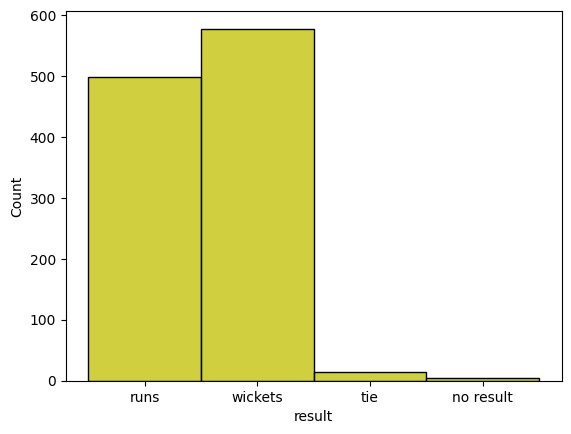

In [52]:
# 9. Find the distribution of match results (runs vs wickets) 

sns.histplot(data['result'],bins=3,color='y')
plt.show()

In [53]:
#  Find the top 5 venues with the most matches played 

venue_count=data.groupby('venue')['venue'].count().nlargest(5)
venue_count

venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

In [54]:
# Find the match with the highest margin of victory (by wickets or runs) 
df_wickets=data[data['result']=='wickets']
df_runs=data[data['result']=='runs']

max_margin_wicket=df_wickets.loc[df_wickets['result_margin'].idxmax()]

max_margin_run=df_runs.loc[df_runs['result_margin'].idxmax()]

max_margin_run,max_margin_wicket


(id                          1082635
 season                         2017
 city                          Delhi
 date                     2017-05-06
 match_type                   League
 player_of_match         LMP Simmons
 venue              Feroz Shah Kotla
 team1              Delhi Daredevils
 team2                Mumbai Indians
 toss_winner        Delhi Daredevils
 toss_decision                 field
 winner               Mumbai Indians
 result                         runs
 result_margin                 146.0
 target_runs                   213.0
 target_overs                   20.0
 super_over                        N
 method                          NaN
 umpire1                 Nitin Menon
 umpire2                   CK Nandan
 Name: 620, dtype: object,
 id                                     335994
 season                                2007/08
 city                                   Mumbai
 date                               2008-04-27
 match_type                             Leagu

In [55]:
#Calculate the win percentage for each team

win_matches=data.groupby('winner')['winner'].count()
played_matches=data.groupby('team1')['team1'].count()+data.groupby('team2')['team2'].count()
played_matches
percentage=win_matches/played_matches*100
print(win_matches/played_matches*100)

winner
Chennai Super Kings            57.983193
Deccan Chargers                38.666667
Delhi Capitals                 52.747253
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Gujarat Titans                 62.222222
Kings XI Punjab                46.315789
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          52.191235
Lucknow Super Giants           54.545455
Mumbai Indians                 55.172414
Pune Warriors                  26.086957
Punjab Kings                   42.857143
Rajasthan Royals               50.678733
Rising Pune Supergiant         62.500000
Rising Pune Supergiants        35.714286
Royal Challengers Bangalore    48.333333
Royal Challengers Bengaluru    46.666667
Sunrisers Hyderabad            48.351648
dtype: float64


In [56]:
# Find the average number of overs played in all matches 

avg_overs=data['target_overs'].mean()
print(avg_overs)

#find average target runs by season

avg_target_runs=data.groupby('season')['target_runs'].mean()
avg_target_runs

19.75934065934066


season
2007/08    159.775862
2009       148.807018
2009/10    165.783333
2011       154.041667
2012       158.540541
2013       156.894737
2014       162.383333
2015       164.706897
2016       160.783333
2017       165.406780
2018       170.200000
2019       167.733333
2020/21    170.500000
2021       160.316667
2022       172.121622
2023       183.397260
2024       190.591549
Name: target_runs, dtype: float64

In [57]:
# Find the most common match outcome (runs, wickets, or no result) 

In [58]:
# Find the total number of matches played at each venue by year

matches_per_vanuie_year=data.groupby(['season','venue']).size()
matches_per_vanuie_year

season   venue                                                             
2007/08  Dr DY Patil Sports Academy                                            4
         Eden Gardens                                                          7
         Feroz Shah Kotla                                                      6
         M Chinnaswamy Stadium                                                 7
         MA Chidambaram Stadium, Chepauk                                       7
                                                                              ..
2024     Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur    5
         Narendra Modi Stadium, Ahmedabad                                      8
         Rajiv Gandhi International Stadium, Uppal, Hyderabad                  6
         Sawai Mansingh Stadium, Jaipur                                        5
         Wankhede Stadium, Mumbai                                              7
Length: 175, dtype: int64

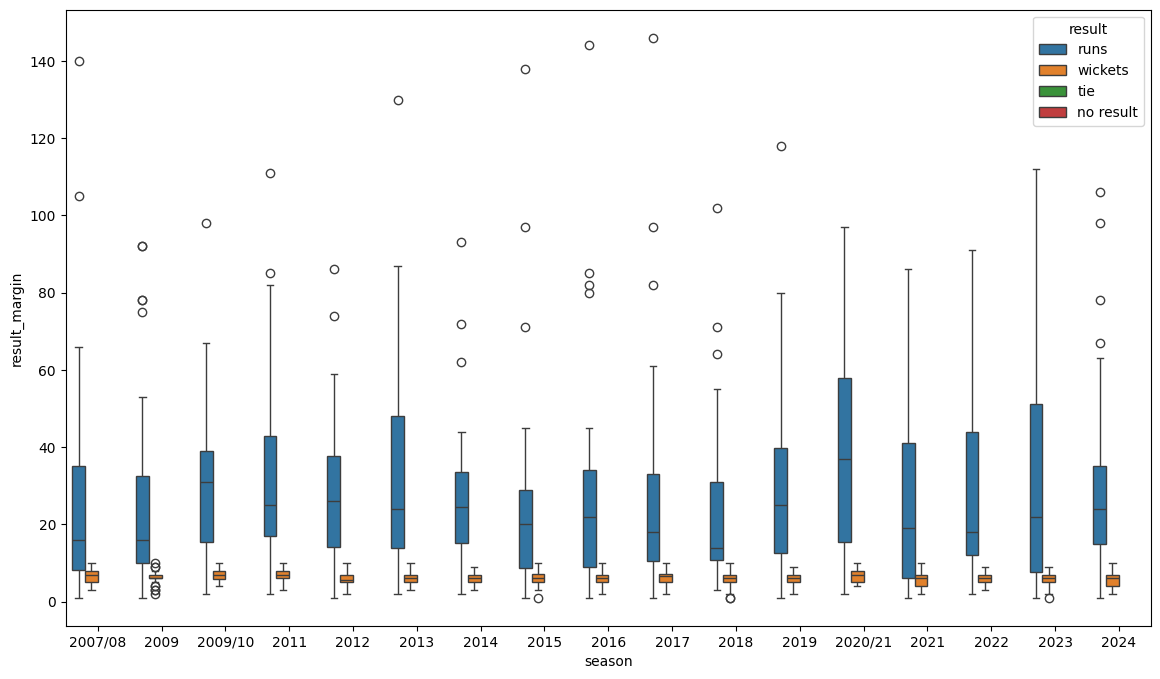

In [59]:
# Analyze the win margin distribution by year 


plt.figure(figsize=(14,8))
sns.boxplot(x='season',y='result_margin',data=data, hue='result')
plt.show()

Total number of no result matches: 5


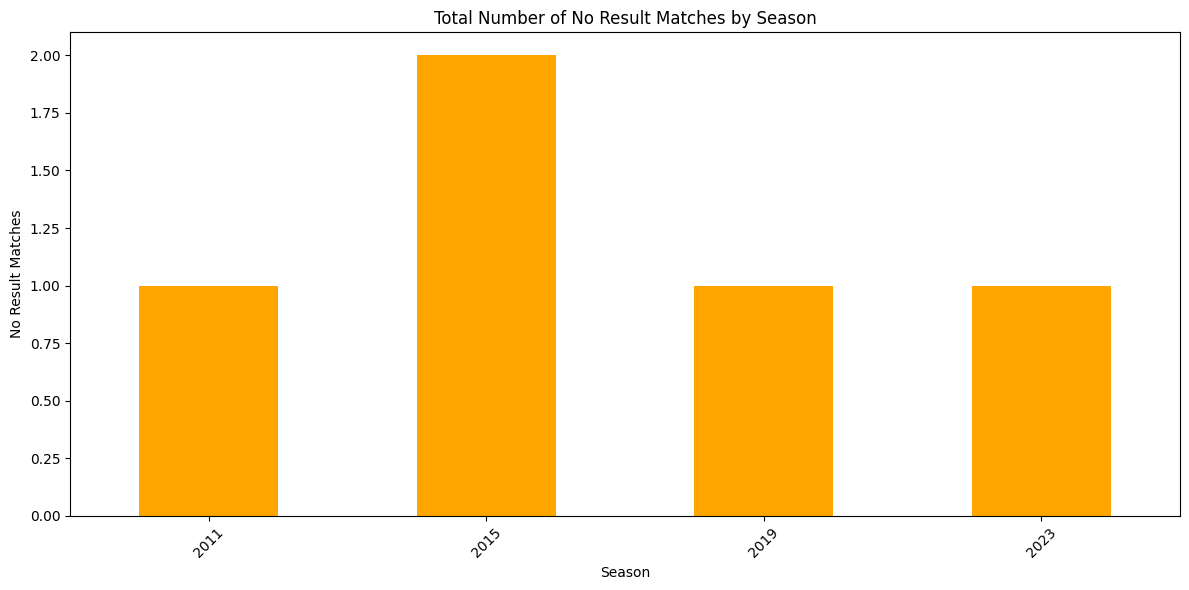

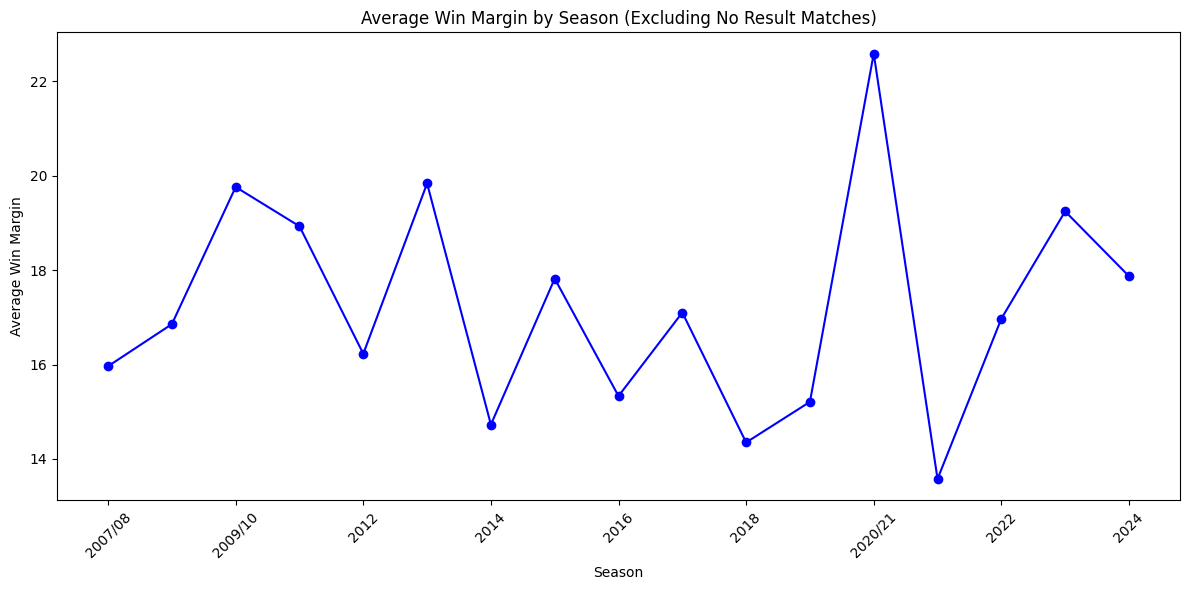

In [60]:
# Calculate the total number of 'no result' matches and their impact on the tournament

no_result_matches=data[data['result']=='no result']
print('Total number of no result matches:',no_result_matches.shape[0])



# Assuming 'data' is your DataFrame and contains match information
no_result_matches = data[data['result'] == 'no result']

# 1. Total 'No Result' Matches per Season
no_result_counts = no_result_matches.groupby('season').size()

#  Plot the total 'no result' matches by season
plt.figure(figsize=(12, 6))
no_result_counts.plot(kind='bar', color='orange')
plt.title('Total Number of No Result Matches by Season')
plt.xlabel('Season')
plt.ylabel('No Result Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Impact on Win Margins (if you want to exclude 'no result' matches)
valid_matches = data[data['result'] != 'no result']
average_margin_by_season = valid_matches.groupby('season')['result_margin'].mean()

# Plot the win margin excluding 'no result' matches
plt.figure(figsize=(12, 6))
average_margin_by_season.plot(kind='line', marker='o', color='blue')
plt.title('Average Win Margin by Season (Excluding No Result Matches)')
plt.xlabel('Season')
plt.ylabel('Average Win Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [61]:
# How many matches were won by teams batting first vs. batting second? 

batting_first_wins=data[(data['team1']==data['winner']) | (data['team2']==data['winner'])]
batting_second_wins=data[(data['team2']==data['winner']) | (data['team1']==data['winner'])]

print('Matches won by teams batting first:',batting_first_wins.shape[0])
print('Matches won by teams batting second:',batting_second_wins.shape[0])

Matches won by teams batting first: 1090
Matches won by teams batting second: 1090


In [62]:
# Find out the average number of runs scored by the winning team

avg_runs_won=data[data['winner']==data['team1']]['target_runs'].mean()

print('Average runs scored by the winning team:',avg_runs_won)


Average runs scored by the winning team: 170.57117117117116


In [63]:
# find out most unsuccessfull team in ipl
percentage=win_matches/played_matches*100
# unsuccessfull_team=data.groupby('team1')['target_runs'].sum().nsmallest(3)
# unsuccessfull_team
percentage.nsmallest(5)

winner
Pune Warriors              26.086957
Rising Pune Supergiants    35.714286
Deccan Chargers            38.666667
Delhi Daredevils           41.614907
Kochi Tuskers Kerala       42.857143
dtype: float64

Explore following for given dataset and also perform EDA.
1. Frequency Distribution of Wins by Wickets
2. Relative Frequency Distribution
3. Cumulative Relative Frequency Graph
4. Probability of Winning by 6 Wickets or Less
5. Normal Distribution of Wins by Wickets
6. Mean, Standard Deviation, and Percentile Calculation
7. Find out outliers for the selective columns for lower range outliers will be lower than mu - 2sigma, similarly for upper range outliers will be greater than mu+2sigma.


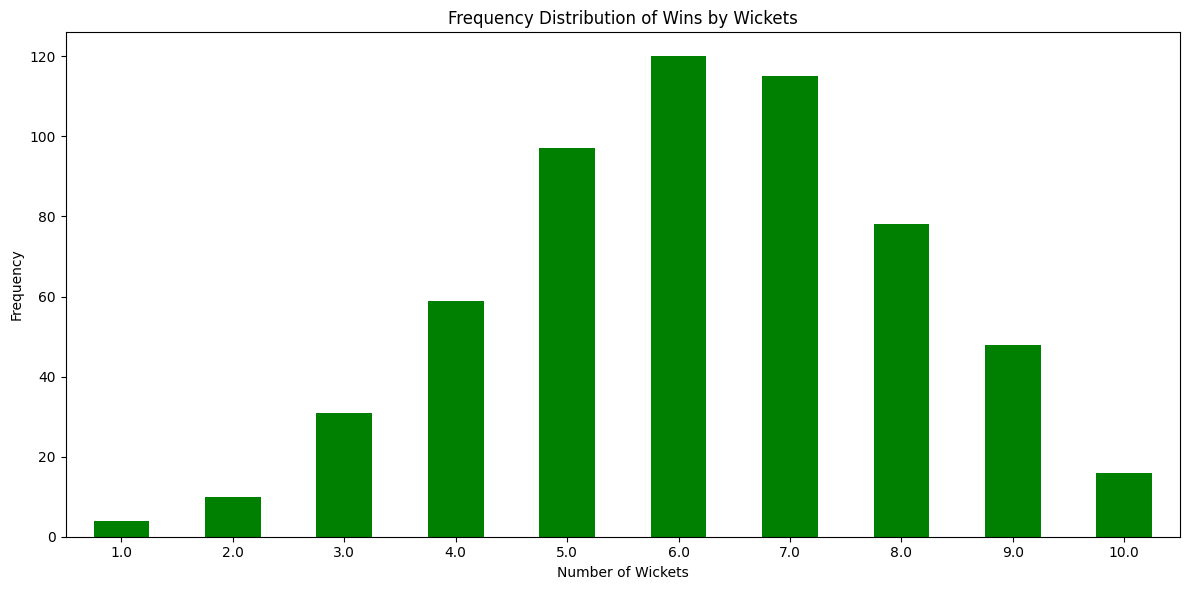

In [64]:
# Frequency Distribution of Wins by Wickets

# Filter the matches won by wickets
wins_by_wickets = data[data['result'] == 'wickets']

# Calculate the frequency distribution
frequency_distribution = wins_by_wickets['result_margin'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
frequency_distribution.plot(kind='bar', color='green')
plt.title('Frequency Distribution of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


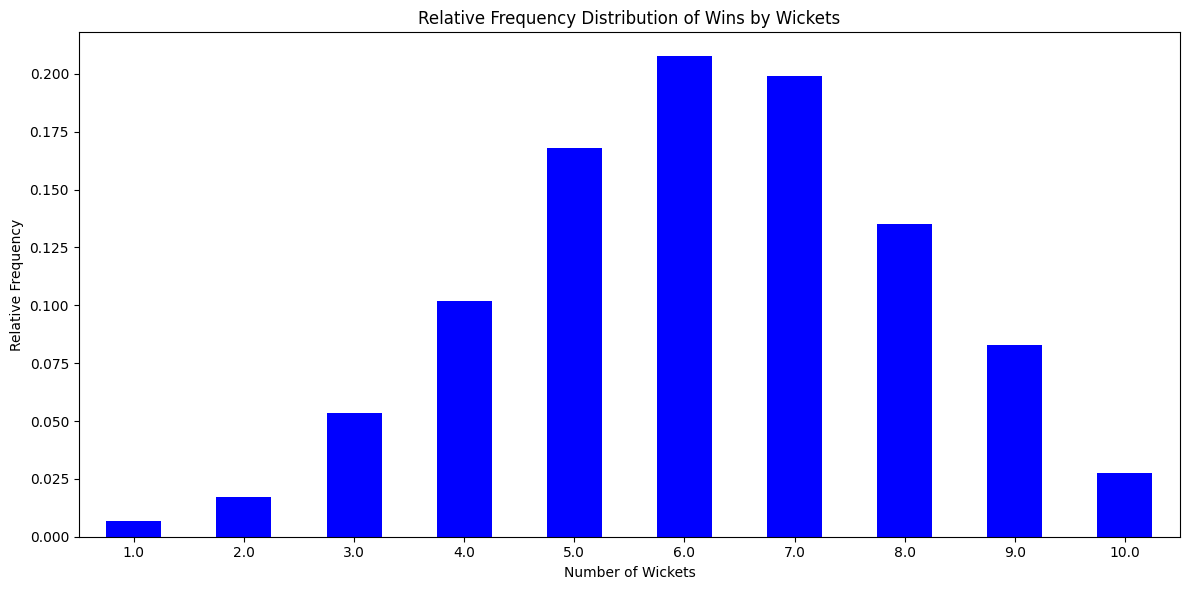

In [65]:
# Relative Frequency Distribution

# Calculate the relative frequency distribution
relative_frequency_distribution = frequency_distribution / frequency_distribution.sum()

# Plot the relative frequency distribution
plt.figure(figsize=(12, 6))
relative_frequency_distribution.plot(kind='bar', color='blue')
plt.title('Relative Frequency Distribution of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

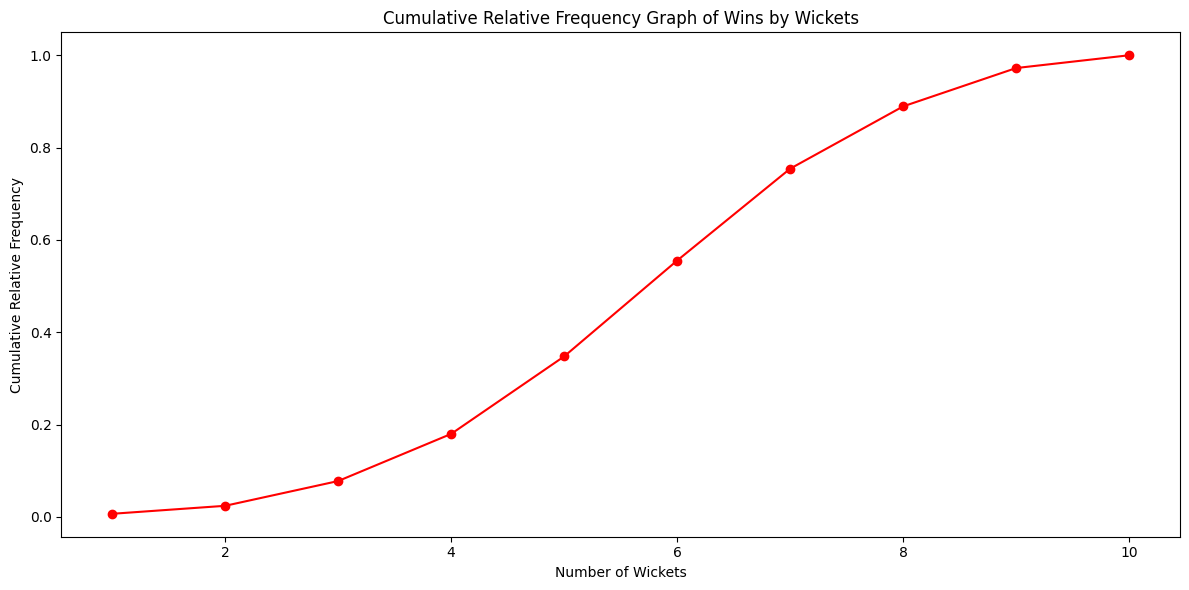

In [66]:
# 3. Cumulative Relative Frequency Graph

# Calculate the cumulative relative frequency
cumulative_relative_frequency = relative_frequency_distribution.cumsum()

# Plot the cumulative relative frequency graph
plt.figure(figsize=(12, 6))
cumulative_relative_frequency.plot(kind='line', marker='o', color='red')
plt.title('Cumulative Relative Frequency Graph of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Cumulative Relative Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [67]:
# Calculate the probability of winning by 6 wickets or less
probability_winning_6_wickets_or_less = frequency_distribution.loc[:6].sum() / frequency_distribution.sum()
print('Probability of winning by 6 wickets or less:', probability_winning_6_wickets_or_less)

Probability of winning by 6 wickets or less: 0.5553633217993079


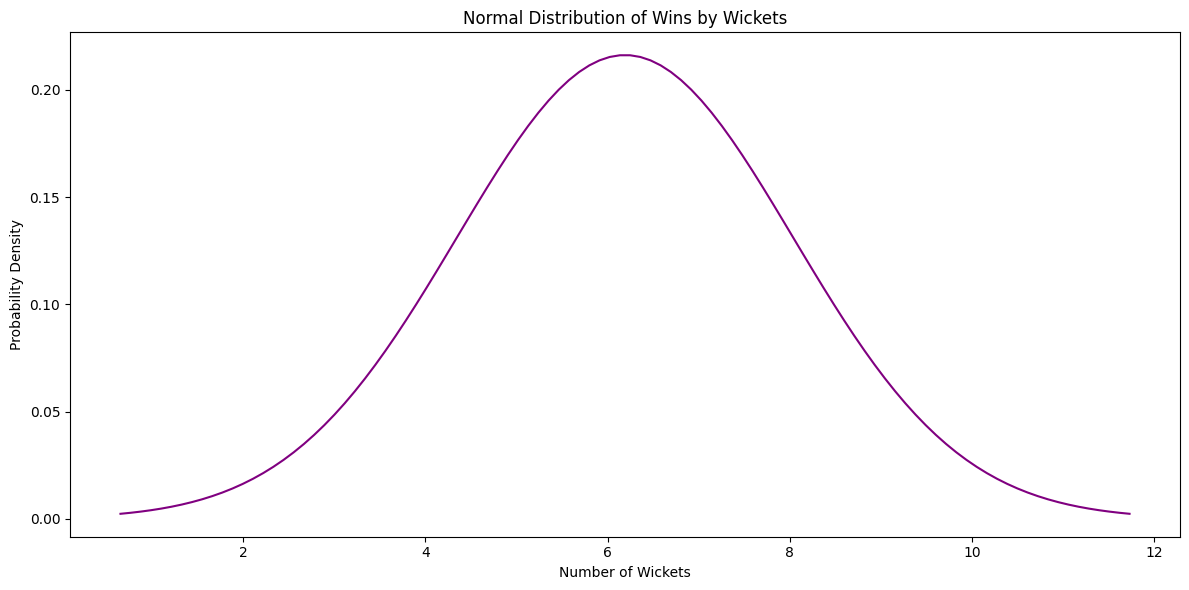

In [68]:
# 5. Normal Distribution of Wins by Wickets

# Filter the matches won by wickets
wins_by_wickets = data[data['result'] == 'wickets']

# Calculate the mean and standard deviation
mean_wickets = wins_by_wickets['result_margin'].mean()
std_wickets = wins_by_wickets['result_margin'].std()

# Generate the x values for the normal distribution
x_values = np.linspace(mean_wickets - 3*std_wickets, mean_wickets + 3*std_wickets, 100)

# Calculate the y values for the normal distribution
y_values = norm.pdf(x_values, mean_wickets, std_wickets)

# Plot the normal distribution
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, color='purple')
plt.title('Normal Distribution of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

In [69]:
# 6. Mean, Standard Deviation, and Percentile Calculation


mean_result_margin = data['result_margin'].mean()

std_result_margin = data['result_margin'].std()

percentiles = np.percentile(data['result_margin'].dropna(), [25, 50, 75])

print('Mean of result margin:', mean_result_margin)
print('Standard deviation of result margin:', std_result_margin)
print('25th, 50th, and 75th percentiles of result margin:', percentiles)

Mean of result margin: 17.259293680297397
Standard deviation of result margin: 21.787443729011315
25th, 50th, and 75th percentiles of result margin: [ 6.  8. 20.]


In [70]:
# Calculate mean and standard deviation for the selective columns
mean_result_margin = data['result_margin'].mean()
std_result_margin = data['result_margin'].std()

mean_target_runs = data['target_runs'].mean()
std_target_runs = data['target_runs'].std()

mean_target_overs = data['target_overs'].mean()
std_target_overs = data['target_overs'].std()

# Find outliers for result_margin
result_margin_outliers = data[(data['result_margin'] < mean_result_margin - 2*std_result_margin) | 
                              (data['result_margin'] > mean_result_margin + 2*std_result_margin)]['result_margin']

# Find outliers for target_runs
target_runs_outliers = data[(data['target_runs'] < mean_target_runs - 2*std_target_runs) | 
                            (data['target_runs'] > mean_target_runs + 2*std_target_runs)]['target_runs']

# Find outliers for target_overs
target_overs_outliers = data[(data['target_overs'] < mean_target_overs - 2*std_target_overs) | 
                             (data['target_overs'] > mean_target_overs + 2*std_target_overs)]['target_overs']

print("Result Margin Outliers:\n", result_margin_outliers)
print("\nTarget Runs Outliers:\n", target_runs_outliers)
print("\nTarget Overs Outliers:\n", target_overs_outliers)

Result Margin Outliers:
 0       140.0
9        66.0
39       65.0
55      105.0
59       75.0
        ...  
1030     63.0
1039    106.0
1058     67.0
1069     78.0
1077     98.0
Name: result_margin, Length: 65, dtype: float64

Target Runs Outliers:
 1       241.0
37       68.0
38       89.0
41       53.0
60       54.0
63       69.0
124      93.0
146     247.0
173      83.0
178      96.0
191      82.0
207      95.0
221      52.0
234      98.0
236     233.0
249      98.0
266      93.0
352     264.0
369      81.0
411      71.0
429      43.0
482      96.0
502     236.0
508      81.0
538      61.0
560     249.0
561      66.0
565      58.0
611      68.0
630      74.0
633      48.0
641      71.0
679     246.0
683      89.0
696      71.0
742     233.0
744      63.0
794      85.0
846      93.0
866      91.0
870     236.0
911      69.0
934      98.0
982     236.0
987     258.0
1022    234.0
1031    278.0
1039    273.0
1043    235.0
1053    288.0
1055     90.0
1058    267.0
1065    262.0
1066   

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2909/409508745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='result', palette='viridis')


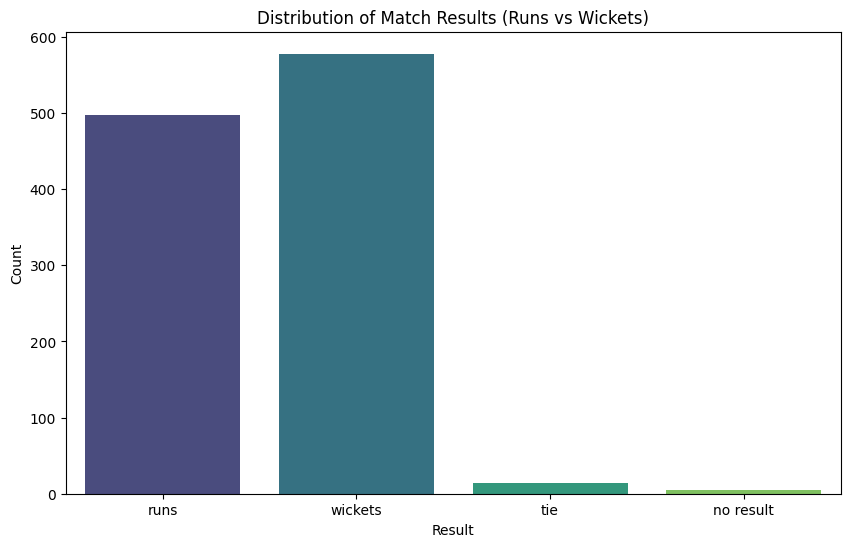

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2909/409508745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='viridis')


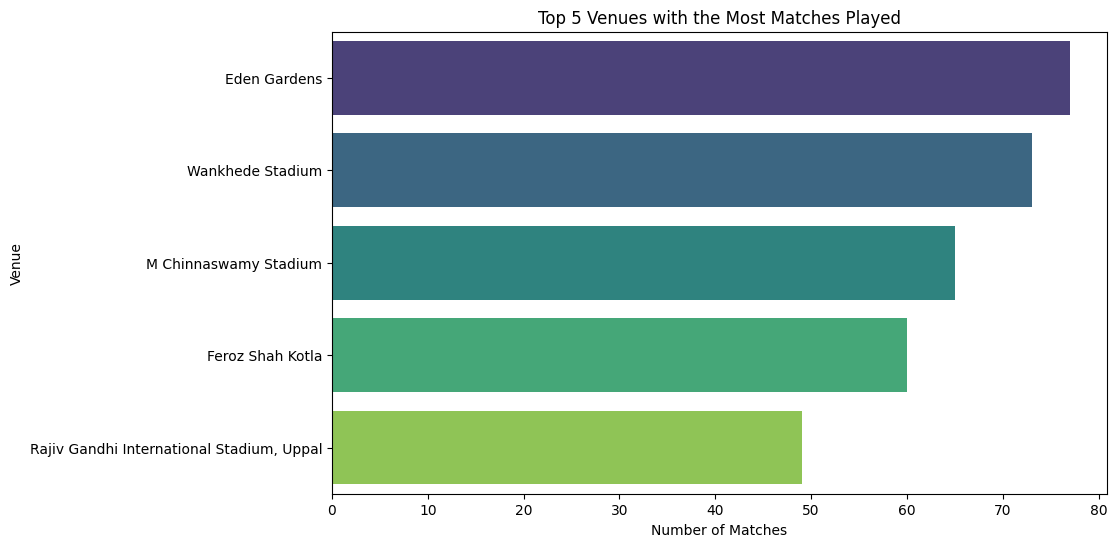

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2909/409508745.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_percentage.values, y=win_percentage.index, palette='viridis')


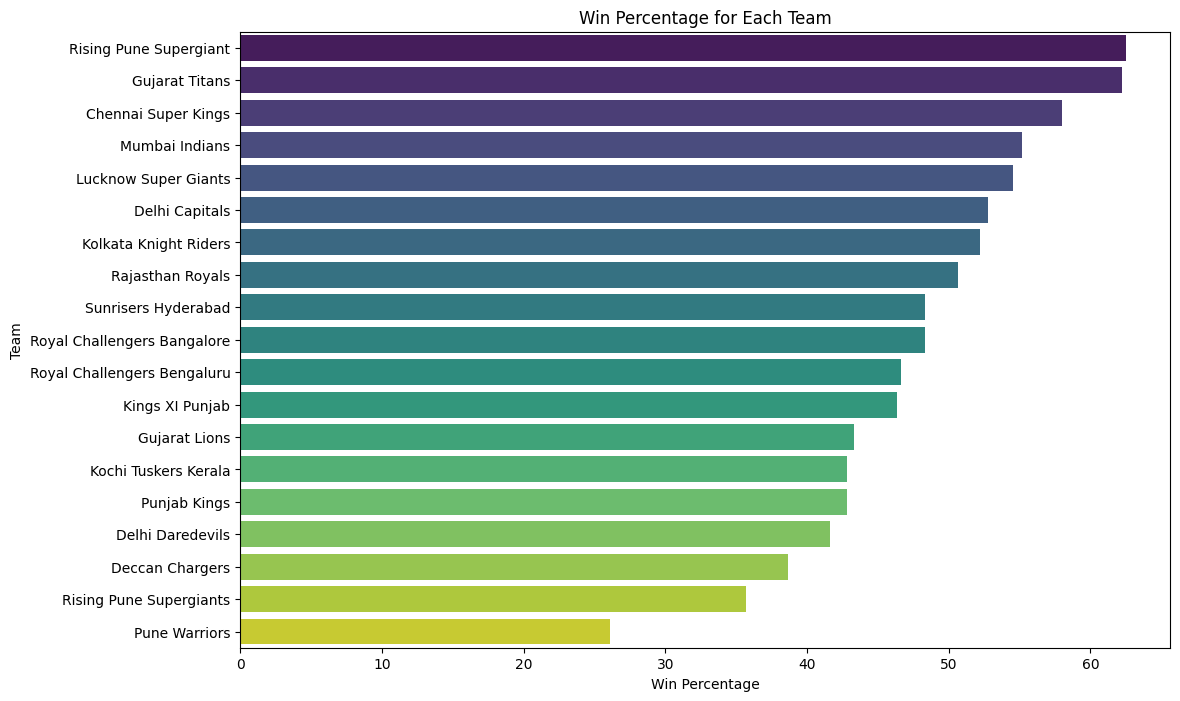

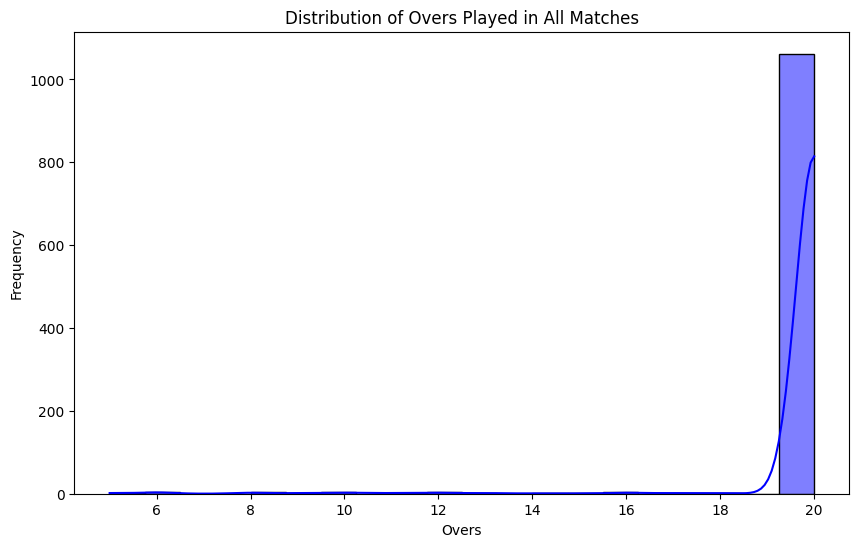

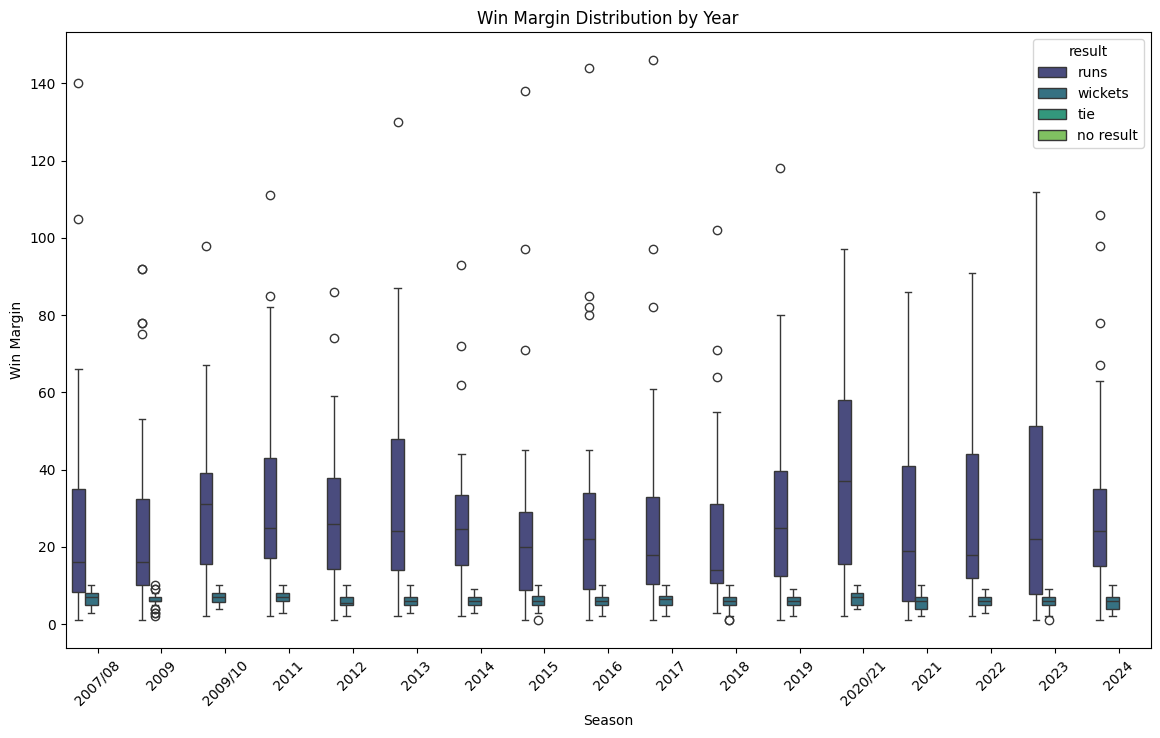

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2909/409508745.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='season', palette='viridis')


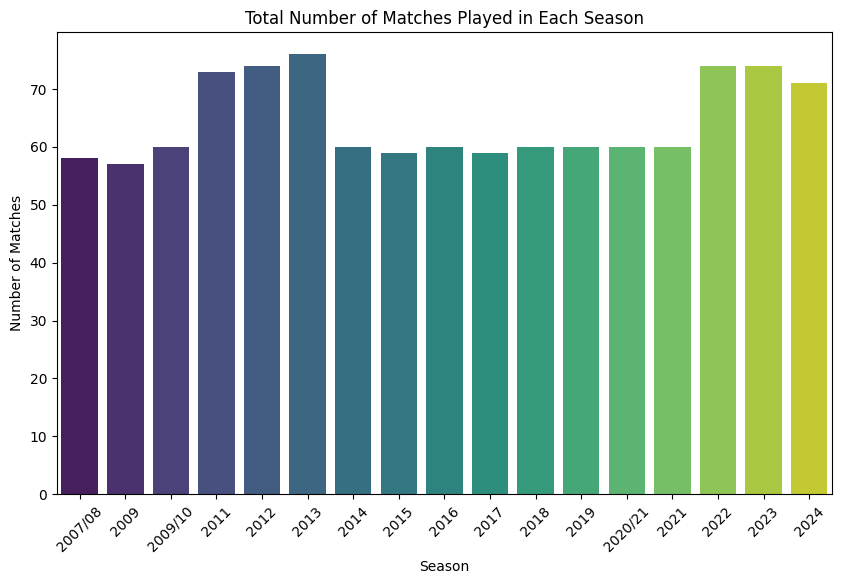

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2909/409508745.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Toss Winner Won', 'Toss Winner Lost'], y=[toss_win_match_win, toss_win_match_lose], palette='viridis')


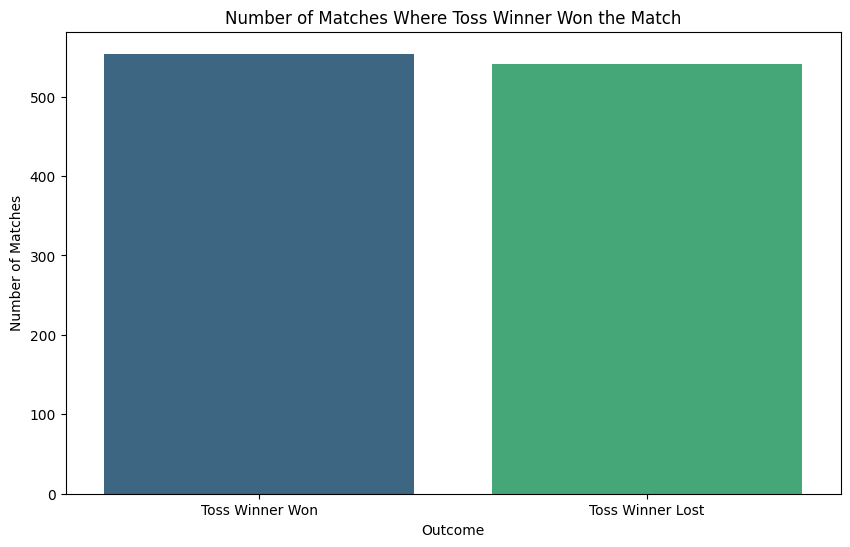

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2909/409508745.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')


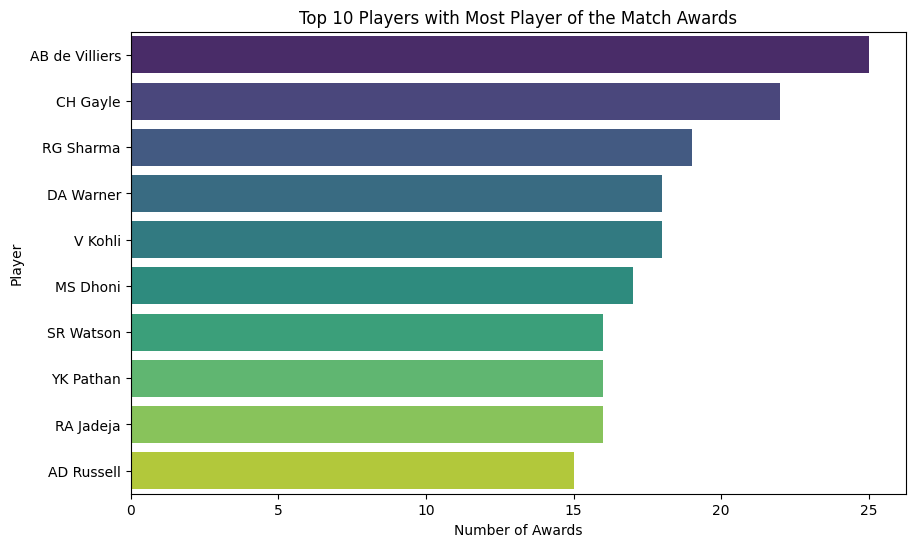

In [72]:
# 1. Distribution of match results (runs vs wickets)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='result', palette='viridis')
plt.title('Distribution of Match Results (Runs vs Wickets)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

# 2. Top 5 venues with the most matches played
top_venues = data['venue'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='viridis')
plt.title('Top 5 Venues with the Most Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

# 3. Win percentage for each team
win_percentage = (win_matches / played_matches * 100).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=win_percentage.values, y=win_percentage.index, palette='viridis')
plt.title('Win Percentage for Each Team')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.show()

# 4. Average number of overs played in all matches
plt.figure(figsize=(10, 6))
sns.histplot(data['target_overs'], bins=20, kde=True, color='blue')
plt.title('Distribution of Overs Played in All Matches')
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.show()

# 5. Distribution of win margins by year
plt.figure(figsize=(14, 8))
sns.boxplot(x='season', y='result_margin', data=data, hue='result', palette='viridis')
plt.title('Win Margin Distribution by Year')
plt.xlabel('Season')
plt.ylabel('Win Margin')
plt.xticks(rotation=45)
plt.show()

# 6. Total number of matches played in each season
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='season', palette='viridis')
plt.title('Total Number of Matches Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

# 7. Number of matches where the toss winner won the match
toss_win_match_win = data[data['toss_winner'] == data['winner']].shape[0]
toss_win_match_lose = data.shape[0] - toss_win_match_win
plt.figure(figsize=(10, 6))
sns.barplot(x=['Toss Winner Won', 'Toss Winner Lost'], y=[toss_win_match_win, toss_win_match_lose], palette='viridis')
plt.title('Number of Matches Where Toss Winner Won the Match')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.show()

# 8. Most successful players (most Player of the Match awards)
top_players = data['player_of_match'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()

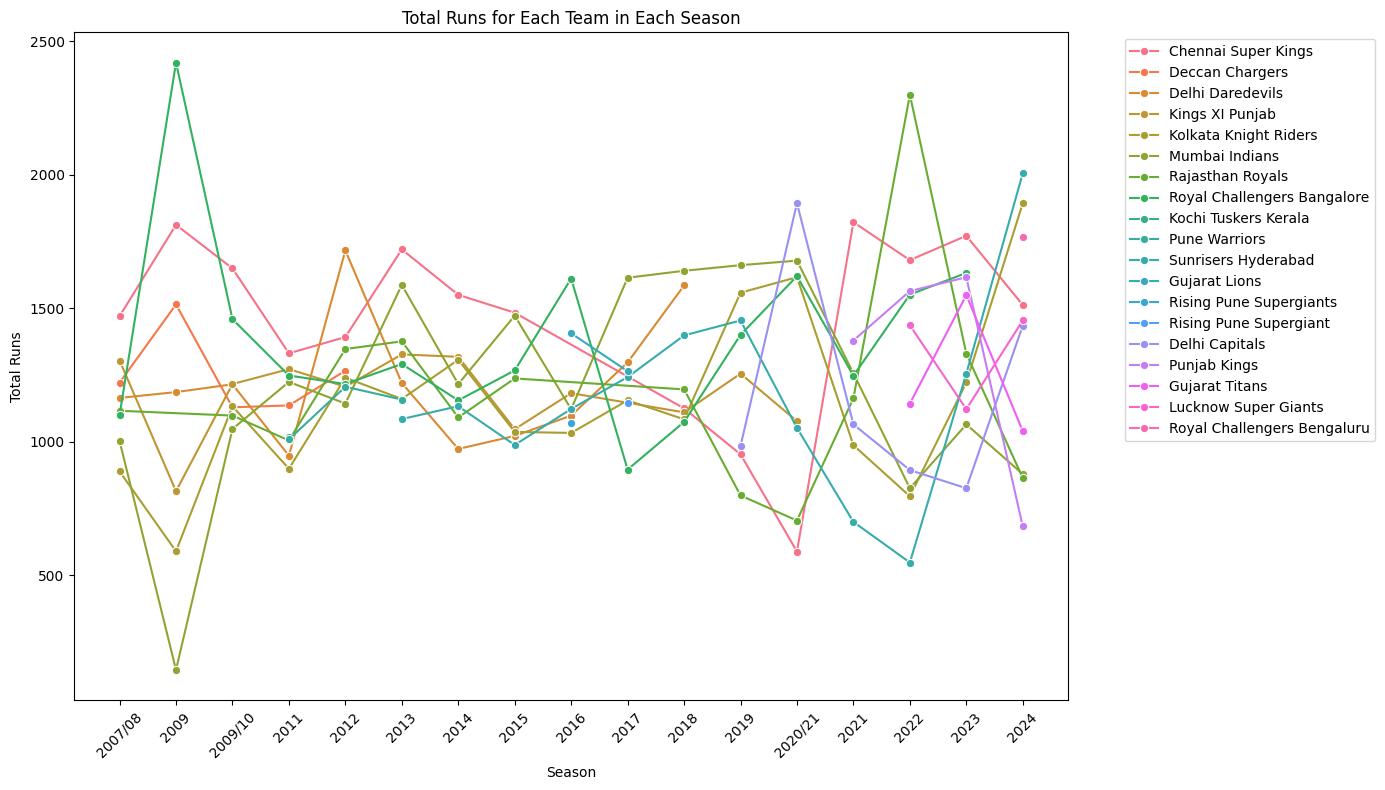

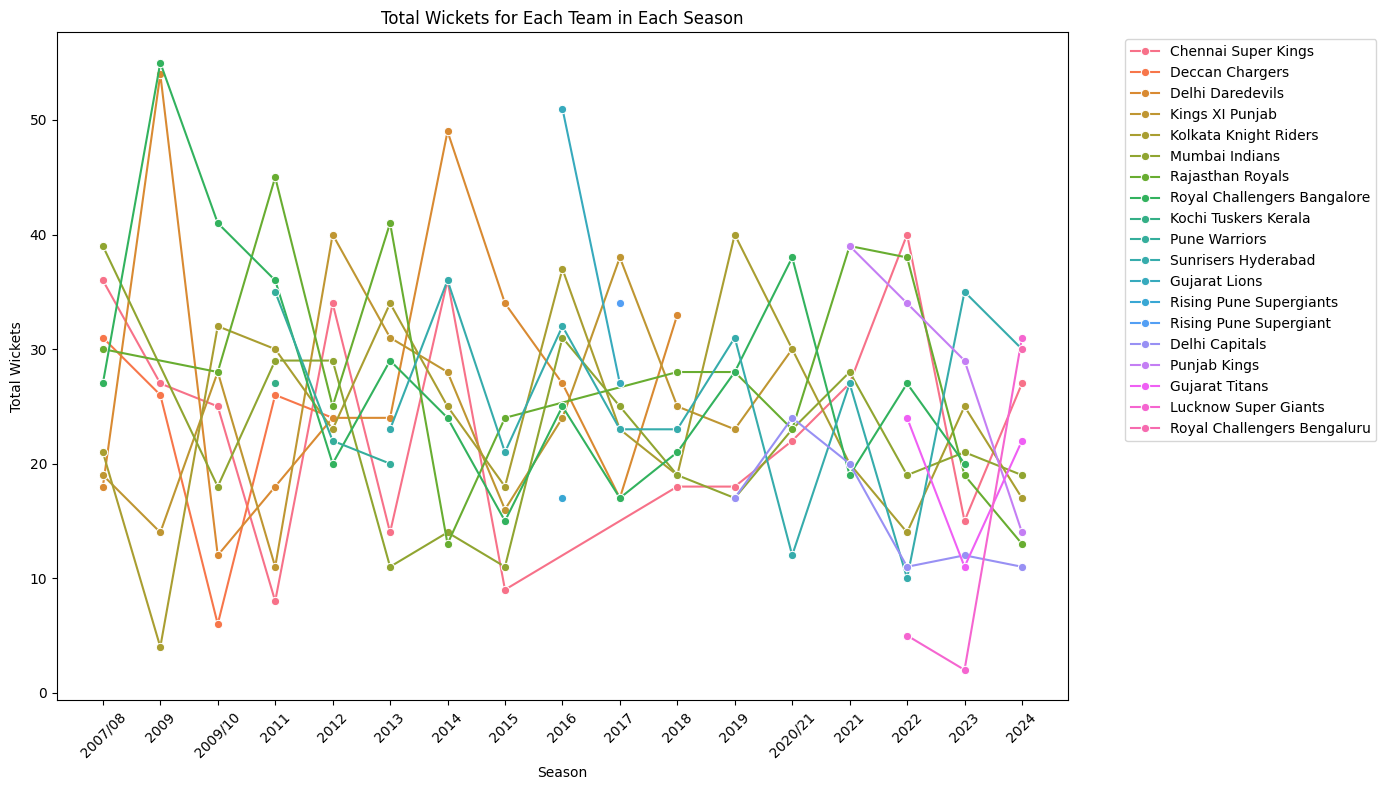

In [73]:
# Group by season and team to get the total runs and wickets
team_runs_season = data.groupby(['season', 'team1'])['target_runs'].sum().reset_index()
team_wickets_season = df_wickets.groupby(['season', 'team1'])['result_margin'].sum().reset_index()

# Plotting the total runs for each team in each season
plt.figure(figsize=(14, 8))
sns.lineplot(data=team_runs_season, x='season', y='target_runs', hue='team1', marker='o')
plt.title('Total Runs for Each Team in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the total wickets for each team in each season
plt.figure(figsize=(14, 8))
sns.lineplot(data=team_wickets_season, x='season', y='result_margin', hue='team1', marker='o')
plt.title('Total Wickets for Each Team in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()